<a href="https://colab.research.google.com/github/natdebandi/migmobs/blob/main/GM_test_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MIGMOBS TEST

**Natalia Dedandi**

Mobility dataset

Check mobility data to Argentina and Chile, from Venezuela and Bolivia

In [1]:
import pandas as pd

In [4]:
# prompt: open a csv file forma drive folder

from google.colab import drive
drive.mount('/content/drive', force_remount=True)

#G:\My Drive\3. Proyectos\MIGMOBS_nat\3_data_repository
# Replace 'your_file_path' with the actual path to your CSV file in Google Drive
file_path = '/content/drive/MyDrive/3. Proyectos/MIGMOBS_nat/3_data_repository/gm_argentina.csv'

df = pd.read_csv(file_path)
print(df.head())


Mounted at /content/drive
   source_name  target_name source_iso3 target_iso3  year  estimated_trips  \
0  Afghanistan       Rwanda         AFG         RWA  2014             29.0   
1  Afghanistan  Netherlands         AFG         NLD  2014           6991.0   
2  Afghanistan        Congo         AFG         COG  2011              0.0   
3  Afghanistan      Hungary         AFG         HUN  2012            308.0   
4  Afghanistan   Cabo Verde         AFG         CPV  2012              0.0   

       dist source_region target_region source_subregion    target_subregion  
0  5755.222          Asia        Africa    Southern Asia  Sub-Saharan Africa  
1  5361.400          Asia        Europe    Southern Asia      Western Europe  
2  7100.583          Asia        Africa    Southern Asia  Sub-Saharan Africa  
3  4367.694          Asia        Europe    Southern Asia      Eastern Europe  
4  9324.580          Asia        Africa    Southern Asia  Sub-Saharan Africa  


## Argentina

I review mobilities to and from Argentina

In [10]:
df_to_arg = df[(df['target_iso3'].str.contains('ARG'))]
df_from_arg = df[(df['source_iso3'].str.contains('ARG'))]

Number of travels to Argentina by year

In [16]:

df_to_arg_year_sum = df_to_arg.groupby('year')['estimated_trips'].sum()
df_from_arg_year_sum = df_from_arg.groupby('year')['estimated_trips'].sum()
df_arg_merge = pd.merge(df_to_arg_year_sum, df_from_arg_year_sum, on='year', suffixes=('_to_arg', '_from_arg'))
df_arg_merge

,estimated_trips_to_arg,estimated_trips_from_arg
year,,
2011,12133921.0,12054578.0
2012,12678938.0,12594641.0
2013,12500972.0,12406685.0
2014,13044692.0,12958212.0
2015,15021604.0,14877831.0
2016,16989971.0,16865399.0


The number of travels to ARG and from is almost the same

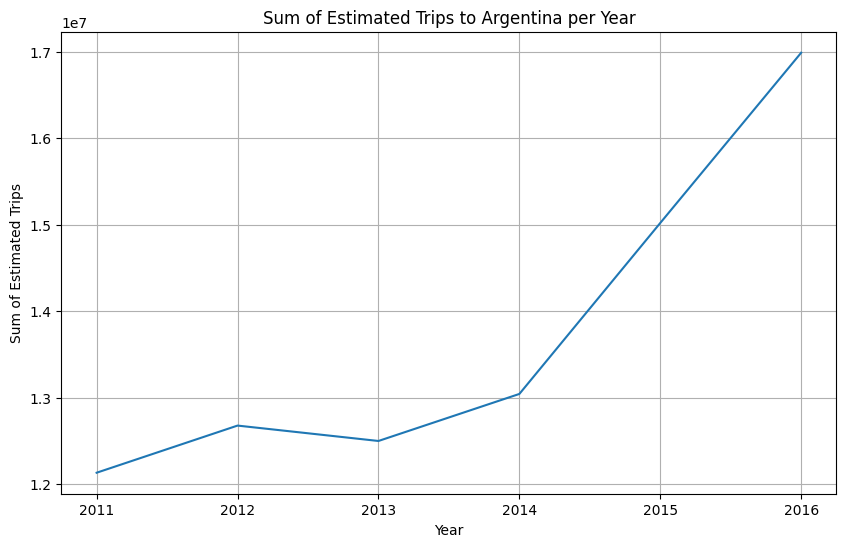

In [17]:
##number of travels from Argentina to other countries

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(df_to_arg_year_sum.index, df_to_arg_year_sum.values)
plt.xlabel('Year')
plt.ylabel('Sum of Estimated Trips')
plt.title('Sum of Estimated Trips to Argentina per Year')
plt.grid(True)
plt.show()


**Top 5 destinations from Argentina**

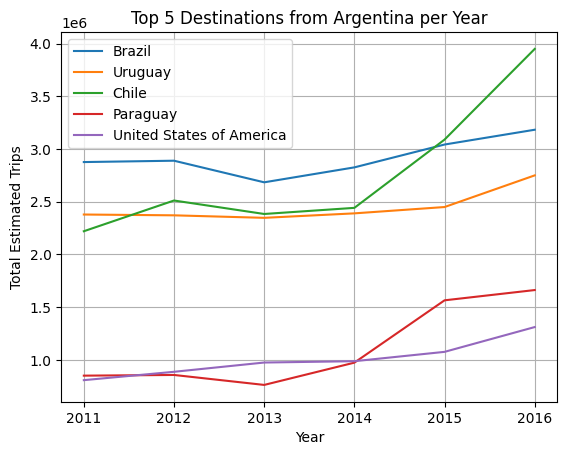

In [19]:
import matplotlib.pyplot as plt
top_5_per_year = df_from_arg.groupby(['year', 'target_name'])['estimated_trips'].sum().groupby('year', group_keys=False).nlargest(5)
top_5_df = top_5_per_year.reset_index(name='total_estimated_trips')

# Assuming top_5_df is your DataFrame with 'year', 'target_name', and 'total_estimated_trips'
for target_name in top_5_df['target_name'].unique():
  df_target = top_5_df[top_5_df['target_name'] == target_name]
  plt.plot(df_target['year'], df_target['total_estimated_trips'], label=target_name)

plt.xlabel('Year')
plt.ylabel('Total Estimated Trips')
plt.title('Top 5 Destinations from Argentina per Year')
plt.legend()
plt.grid(True)
plt.show()


**Top 5 origins of travel to Argentina**

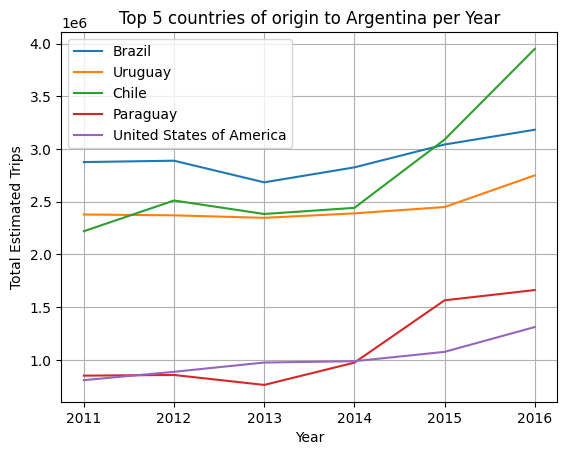

In [22]:
top_5_per_year_to = df_to_arg.groupby(['year', 'source_name'])['estimated_trips'].sum().groupby('year', group_keys=False).nlargest(5)
top_5_df_to = top_5_per_year_to.reset_index(name='total_estimated_trips')

for source_name in top_5_df_to['source_name'].unique():
  df_target = top_5_df[top_5_df_to['source_name'] == source_name]
  plt.plot(df_target['year'], df_target['total_estimated_trips'], label=source_name)

plt.xlabel('Year')
plt.ylabel('Total Estimated Trips')
plt.title('Top 5 countries of origin to Argentina per Year')
plt.legend()
plt.grid(True)
plt.show()


# Chile

In [26]:
df_to_chl = df[(df['target_iso3'].str.contains('CHL'))]
df_from_chl = df[(df['source_iso3'].str.contains('CHL'))]

In [27]:
df_to_chl_year_sum = df_to_chl.groupby('year')['estimated_trips'].sum()
df_from_chl_year_sum = df_from_chl.groupby('year')['estimated_trips'].sum()
df_chl_merge = pd.merge(df_to_chl_year_sum, df_from_chl_year_sum, on='year', suffixes=('_to_chl', '_from_chl'))
df_chl_merge

,estimated_trips_to_chl,estimated_trips_from_chl
year,,
2011,5916559.0,5927374.0
2012,6528705.0,6550168.0
2013,6644472.0,6669163.0
2014,7172922.0,7231466.0
2015,8405899.0,8503460.0
2016,9791534.0,9935420.0


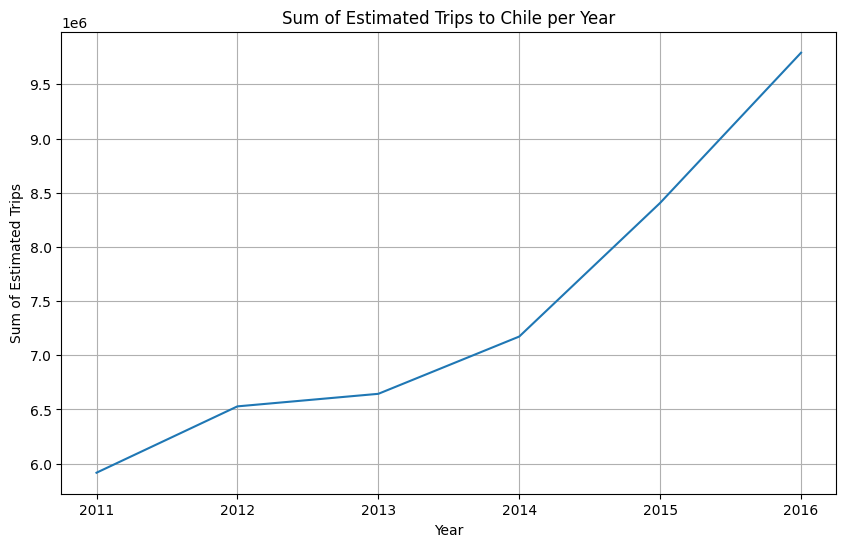

In [28]:
##number of travels from Argentina to other countries

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(df_to_chl_year_sum.index, df_to_chl_year_sum.values)
plt.xlabel('Year')
plt.ylabel('Sum of Estimated Trips')
plt.title('Sum of Estimated Trips to Chile per Year')
plt.grid(True)
plt.show()

In [30]:
merged_df_arg_chl = pd.merge(df_to_chl_year_sum, df_to_arg_year_sum, on='year')
merged_df_arg_chl = merged_df_arg_chl.rename(columns={'estimated_trips_x': 'CHL', 'estimated_trips_y': 'ARG'})

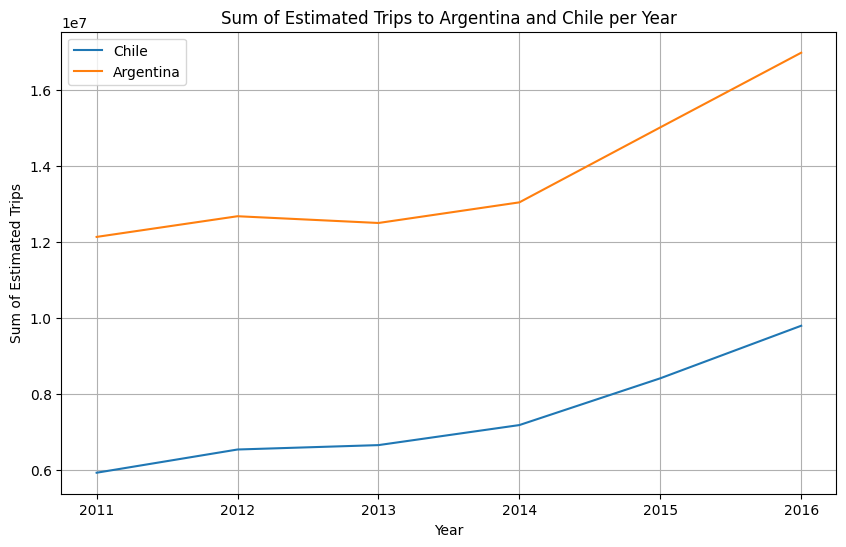

In [31]:
plt.figure(figsize=(10, 6))
plt.plot(merged_df_arg_chl.index, merged_df_arg_chl['CHL'], label='Chile')
plt.plot(merged_df_arg_chl.index, merged_df_arg_chl['ARG'], label='Argentina')
plt.xlabel('Year')
plt.ylabel('Sum of Estimated Trips')
plt.title('Sum of Estimated Trips to Argentina and Chile per Year')
plt.legend()
plt.grid(True)
plt.show()

I understand that these mobilities are mostly for tourism, work, visits and of Argentineans or Chileans to other countries.

The amount is related to the population of each country.